In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import warnings
users = pd.read_csv('datasets/users.csv')
print("Dataset shape  :",users.shape)
warnings.filterwarnings("ignore")
total_data=982


Dataset shape  : (982, 3)


In [2]:
common_passwords = pd.read_csv('datasets/10_million_password_list_top_10000.txt', header=None, squeeze=True)

In [3]:
users['length'] = users['password'].str.len()
users['too_short'] = users['length']<8
print("Number of users using Short length password ",sum(users['too_short']))
df=users[users['too_short']==True]['user_name'].head(25)
print(df)
too_short=sum(users['too_short'])

Number of users using Short length password  376
5        shawn.harrington
6              evelyn.gay
7             noreen.hale
8             gladys.ward
11        milford.hubbard
13          jamie.cochran
15             lorrie.gay
16           domingo.dyer
17         martin.pacheco
18          shelby.massey
22          jenny.woodard
25           dianna.munoz
26           julia.savage
28        joaquin.walters
30           rosanna.reid
34           roger.golden
38            gus.padilla
43         vito.nicholson
45           morris.price
47           jarred.white
48           junior.burch
52        rosario.merrill
56           dwayne.hurst
58    rosalinda.rodriquez
59       landon.middleton
Name: user_name, dtype: object


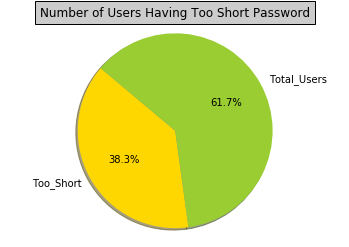

In [4]:
labels = 'Too_Short', 'Total_Users'
total1=total_data-too_short
sizes = [too_short, total1 ]
colors = ['gold', 'yellowgreen']

plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Number of Users Having Too Short Password", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [5]:
users['common_password'] = users['password'].isin(common_passwords)
print("Number of users Having Common Passwords "+str(sum(users['common_password'])))
common_password=sum(users['common_password'])
df=users[users['common_password']==True]['user_name']
print(df.head(25))

Number of users Having Common Passwords 129
6               evelyn.gay
7              noreen.hale
16            domingo.dyer
21         leticia.sanford
51            ahmad.hopper
58     rosalinda.rodriquez
78            roland.mcgee
81            seymour.ball
84         dorian.caldwell
89           jordan.hurley
101              dee.mccoy
112          juliette.rios
115             emily.wise
118       wilburn.shepherd
120          diego.elliott
133           brandi.russo
146            patti.dixon
147            lara.bright
151        roland.whitaker
158         stefan.wheeler
163            dixie.noble
165          major.daniels
184        charlotte.morin
196          jamie.goodman
205        blake.donaldson
Name: user_name, dtype: object


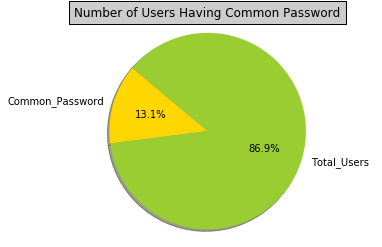

In [6]:
labels = 'Common_Password', 'Total_Users'
total2=total_data-common_password
sizes = [common_password, total2 ]
colors = ['gold', 'yellowgreen']

plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Number of Users Having Common Password", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [7]:
words = pd.read_csv('datasets/google-10000-english.txt', header=None, squeeze=True)
users['common_word'] = users['password'].str.lower().isin(words)
print("Number of users Containing Common Words in their Passwords   :"+str(sum(users['common_word'])))
common_word=sum(users['common_word'])
users[users['common_word']==True]['user_name'].head(25)

Number of users Containing Common Words in their Passwords   :137


6               evelyn.gay
7              noreen.hale
16            domingo.dyer
30            rosanna.reid
58     rosalinda.rodriquez
81            seymour.ball
92       marguerite.hunter
101              dee.mccoy
115             emily.wise
118       wilburn.shepherd
120          diego.elliott
130          zelma.rosario
134           tonia.patton
136              rhea.ware
145         cary.schneider
151        roland.whitaker
172           tanya.gaines
181        loretta.dickson
184        charlotte.morin
196          jamie.goodman
205        blake.donaldson
216             jerry.cash
220            patty.riggs
224       josephine.burton
227            tanya.brown
Name: user_name, dtype: object

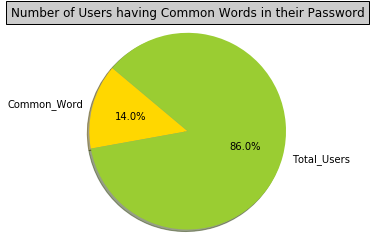

In [8]:
labels = 'Common_Word', 'Total_Users'
total3=total_data-common_word
sizes = [common_word, total3 ]
colors = ['gold', 'yellowgreen']

plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Number of Users having Common Words in their Password", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [9]:
users['first_name'] = users['user_name'].str.extract(r'(^\w+)', expand=False)
users['last_name'] = users['user_name'].str.extract(r'(\w+$)', expand=False)
users['uses_name'] = (users['first_name'].str.lower() == users['password']) | ((users['last_name']).str.lower()== users['password'])
print("Number of users Containing  User Name as their Password   :"+str(sum(users['uses_name'])))
uses_name=sum(users['uses_name'])
users[users['uses_name']==True]['user_name'].head(25)

Number of users Containing  User Name as their Password   :50


11      milford.hubbard
22        jenny.woodard
30         rosanna.reid
84      dorian.caldwell
89        jordan.hurley
112       juliette.rios
122        caleb.powers
136           rhea.ware
147         lara.bright
151     roland.whitaker
158      stefan.wheeler
163         dixie.noble
193    anderson.dillard
205     blake.donaldson
234          staci.pugh
238       iris.chandler
240    margie.zimmerman
246      vicente.hopper
277        byron.cooley
302     kenneth.kennedy
320     brandon.francis
322       harry.collier
349        viola.foster
400     jerome.mcfadden
424     marjorie.haynes
Name: user_name, dtype: object

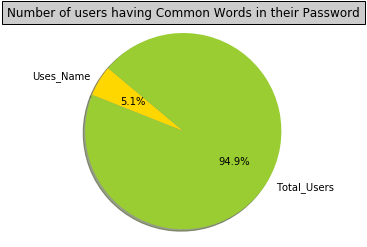

In [10]:
labels = 'Uses_Name', 'Total_Users'
total4=total_data-uses_name
sizes = [uses_name, total4 ]
colors = ['gold', 'yellowgreen']

plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Number of users having Common Words in their Password", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [11]:
users['too_many_repeats'] = users['password'].str.contains(r'(.)\1\1\1')
#print(users[users['too_many_repeats']==True])
print("Number of users  having Repetative  Passwords     :"+str(sum(users['too_many_repeats'])))
too_many_repeat=sum(users['too_many_repeats'])
users[users['too_many_repeats']==True]['user_name']


Number of users  having Repetative  Passwords     :6


146         patti.dixon
572    cornelia.bradley
644         essie.lopez
798         charley.key
807     thurman.osborne
941      mitch.ferguson
Name: user_name, dtype: object

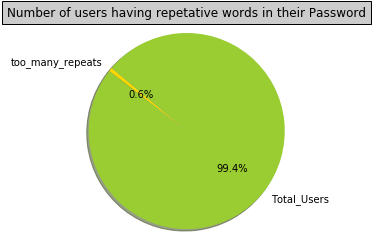

In [12]:
labels = 'too_many_repeats', 'Total_Users'
total5=total_data-too_many_repeat
sizes = [too_many_repeat, total5 ]
colors = ['gold', 'yellowgreen']

plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Number of users having repetative words in their Password", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [13]:
users['bad_password'] = ((users['too_short'])|(users['common_password'])|(users['common_word'])|(users['uses_name'])|(users['too_many_repeats']))
print("Number of Users having Bad Passwords     :"+str(sum(users['bad_password'])))
users[users['uses_name']==True]['user_name'].head(25)
bad_password=sum(users['bad_password'])

Number of Users having Bad Passwords     :424


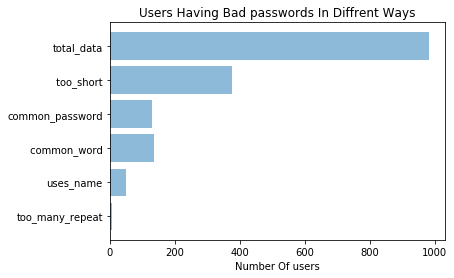

In [15]:
objects = ('too_many_repeat', 'uses_name',' common_word', 'common_password',' too_short','total_data' )
x_pos = np.arange(len(objects))
performance = [too_many_repeat, uses_name, common_word, common_password, too_short,total_data]

plt.barh(x_pos, performance, align='center', alpha=0.5)
plt.yticks(x_pos, objects)
plt.xlabel('Number Of users')
plt.title('Users Having Bad passwords In Diffrent Ways')

plt.show()